# <font face="Verdana" size=6 color='#6495ED'> ANÁLISE ESTATÍSTICA DE DADOS

<font face="Verdana" size=3 color='#40E0D0'> Profs. Larissa Driemeier e Arturo Forner-Cordero

<center><img src='https://drive.google.com/uc?export=view&id=1nW_7p_LyFhbR0ipjSekPcAj6kDoyK73R' width="800"></center>

Este notebook faz parte da aula 02 do curso [IAD-001](https://alunoweb.net/moodle/pluginfile.php/139715/mod_resource/content/1/EST_02_Y2024.pdf).

# Importando bibliotecas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

# Escalares, Vetores, Matrizes e Tensores

__Escalares:__ são apenas um único número. Por exemplo, temperatura, idade, altura, glicemia de jejum, que são denotados por apenas um número.

__Vetores:__ Um vetor é uma tupla de dois ou mais escalares. Os vetores são construídos a partir de componentes, organizados em ordem e podemos identificar cada número individual por seu índice nessa ordenação. Você pode pensar em um vetor como uma lista de números que representam pontos de identificação no espaço, com cada elemento dando a coordenada ao longo de um eixo diferente. Em termos simples, um vetor é uma seta que representa uma quantidade que tem magnitude e direção, em que o comprimento da seta representa a magnitude e a orientação indica a direção. Por exemplo vento, velocidade que tem uma direção e magnitude.

__Matrizes:__ Matriz é um conjunto de números dispostos em linhas e colunas de modo a formar uma estrutura 2D. Portanto, cada elemento é identificado por dois índices em vez de apenas um. Se uma matriz de valor real $\boldsymbol{A}$ tem altura $m$ e largura $n$, então dizemos que $\boldsymbol{A} \in \mathbb{R}^{m \times n}$. Identificamos os elementos da matriz como $a_{i,j}$ onde $i$ representa a linha e $j$ representa a coluna do elemento.

__Tensores:__ são generalizações de escalares (que não têm índices), vetores (que têm exatamente um índice) e matrizes (que têm exatamente dois índices) para um número arbitrário de índices. Um escalar é um tensor de dimensão 0 (0D). Ele, portanto, tem 0 eixos e é de rank 0 (nomenclatura de tensor para *número de eixos*). Um vetor é um tensor de dimensão única (1D), comumente chamado de *array*. Tem 1 eixo e é de rank 1. Uma matriz é um tensor de rank 2, o que significa que tem 2 eixos. Embora, tecnicamente, essas construções (escalares, vetores e matrizes) sejam *tensores*, coloquialmente, chamamos somente aquilo que é maior que uma matriz de *tensor*, a fim de evitar confusão.

O código abaixo cria um tensor 3D. Se fôssemos empacotar uma série deles em um contêiner de tensor de ordem superior, ele seria referido como um tensor 4D; embalá-los em outra ordem superior, 5D, e assim por diante.

<center><img src='https://drive.google.com/uc?export=view&id=16FdzWzqhVQwc0SS8hTg1WWjijXwLKE7K' width="600"></center>



* `np.ndim`: O número de dimensões (eixos) do *array*;
* `np.shape`: Uma tupla de *N* inteiros positivos que especifica o tamanho (número de elementos) de cada dimensão. Para uma matriz com *m* linhas e *n* colunas, a forma será *(m, n)*. O comprimento da forma da tupla é, portanto, o número de dimensões, definido com `np.ndim`.
* `np.size`: O número total de elementos na matriz. Isso é igual ao produto dos elementos de `n.shape`.

Extraído do [link](https://towardsdatascience.com/numpy-for-data-science-part-1-21e2c5ddbbd3).

In [5]:
x = np.array(42)
print(x)
print('Um escalar tem rank %d' %(x.ndim))
x.ndim,x.shape

42
Um escalar tem rank 0


(0, ())

In [6]:
x = np.array([1, 1, 2, 3, 5, 8])
print(x)
print('Um vetor tem rank {:d}'.format(x.ndim))
x.ndim,x.shape

[1 1 2 3 5 8]
Um vetor tem rank 1


(1, (6,))

In [7]:
x.size

6

Observe na resposta acima para `x.ndim, x.shape`: (1, (6,)). Isso representa o fato de que o tensor `x` tem 1 dimensão (rank 1) com 6 elementos.

Na resposta abaixo para `x.ndim, x.shape`: (2, (3,3)). Isso representa o fato de que o tensor `x` tem 2 dimensões (rank 2) com 3x3 elementos em cada dimensão.

In [ ]:
x = np.array([[1, 4, 7],
              [2, 5, 8],
              [3, 6, 9]])
print(x)
print('A matriz tem rank {:d}'.format(x.ndim))
x.ndim,x.shape

In [ ]:
x.size

In [ ]:
x = np.array([[[1, 4, 7],
               [2, 5, 8],
               [3, 6, 9]],
              [[10, 40, 70],
               [20, 50, 80],
               [30, 60, 90]]])
print(x)
print('O tensor mostrado é de rank {:d}'.format(x.ndim))
x.ndim,x.shape

In [ ]:
x.size

## Exemplo

Veja o tensor que representa a imagem do elefante abaixo.

<center><img src='https://drive.google.com/uc?export=view&id=12G94QvL3K_7Ht0OCBifcWfzPoFVKdwHI' width="400"></center>


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
from PIL import Image

img = Image.open('Elefante.png')
plt.imshow(img);

In [ ]:
pix = img.load()
print(img.size)  # Para sabermos o número de pixels (largura e altura)
x,y=0,0
print(pix[x,y])  # selecionar o valor RGBA de um pixel da imagem

Veja que, como a imagem está no formato PNG possui 4 canais, R (red) B (blue), G (green) e A (alpha). O valor alfa indica a transparência da cor — o quanto a cor é misturada com a cor de fundo. Os valores alfa variam de 0 a 255, onde 0 representa uma cor totalmente transparente e 255 representa uma cor totalmente opaca.

In [ ]:
data=np.array(img)
print(data.shape)
data = data[:, :, :3]
print(np.shape(data[0,0,:]))
data[0,0,:]

In [ ]:
data.shape

Uma atividade extra...

A função `Image.thumbnail` redimensiona para o maior tamanho que (a) preserva a proporção, (b) não excede a imagem original e (c) não ultrapassa o tamanho especificado nos argumentos da função.

In [ ]:
img.thumbnail((64, 64), Image.LANCZOS)
# resizes image in-place
imgplot = plt.imshow(img);

In [ ]:
data=np.array(img)
data.shape

## Vetores

### Produto interno entre vetores

O produto interno entre dois vetores,
$$
\boldsymbol{r}=\begin{bmatrix} r_1 \\ r_2 \\ \vdots \\ r_n \end{bmatrix} \qquad \boldsymbol{v}=\begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix},
$$
é definido como $\boldsymbol{r}^T\boldsymbol{v}=\boldsymbol{v}^T\boldsymbol{r}$, ie, $\sum_ir_iv_i$. Por exemplo:
$$
\boldsymbol{r}^T\boldsymbol{v}=\begin{bmatrix} r_1 & r_2  & r_3 \end{bmatrix} \begin{bmatrix} v_1 \\ v_2 \\  v_3 \end{bmatrix}=r_1v_1+r_2v_2+r_3v_3
$$

Se queremos saber a dimensão de um vetor, basta tirar a raiz do seu produto interno!

<center><img src='https://drive.google.com/uc?export=view&id=1zKsFK9sVKPCarAZgmk8ss8-_jl-W6_9R' width="400"></center>


In [8]:
v1 = np.array([10,20,30])
v2= np.array([2,3,4])
np.inner(v1,v2)

200

In [9]:
v1 = np.ones(4) #vetor de 1s de dimensão 4: [1.,  1.,  1.,  1.]
v2 = np.linspace(-1, 2, 4) #vetor com 4 valores igualmente espaçados de -1 a 2: [-1.,  0.,  1.,  2.]
np.outer(v1,v2)

array([[-1.,  0.,  1.,  2.],
       [-1.,  0.,  1.,  2.],
       [-1.,  0.,  1.,  2.],
       [-1.,  0.,  1.,  2.]])

### Projeção vetorial e projeção escalar de vetores
Dados dois vetores $\mathbf{u}$ e $\mathbf{v}$, a projeção escalar de $\mathbf{v}$ em $\mathbf{u}$ significa a magnitude de $\mathbf{v}$ na direção de $\mathbf{u}$,
\begin{equation}
\frac{\mathbf{v} \cdot \mathbf{u}}{\left \| \mathbf{u} \right\|}
\end{equation}

onde $\left \| \mathbf{u} \right\|$ é o módulo de $\mathbf{u}=\sqrt{u_1^2+u_2^2+u_3^2}$.

A projeção vetorial significa a magnitude de $\mathbf{v}$  na direção do vetor $\mathbf{u}$,
\begin{equation}
\frac{\mathbf{v} \cdot \mathbf{u}}{\left \| \mathbf{u} \right\|} \frac{\mathbf{u}}{\left \| \mathbf{u} \right\|} =\frac{\mathbf{v} \cdot \mathbf{u}}{\left \| \mathbf{u} \right\|^2} \mathbf{u}
\end{equation}

Veja que a projeção escalar é um valor e a projeção vetorial é um vetor com o módulo igual ao valor da projeçaõ escalar.


In [10]:
#Projeção escalar e vetorial, conforme exercício na no slide 22 da aula 02 (recordação de Algebra Linear)
u = np.array([3, -4, 0]).T
v = np.array([10, 5, -6]).T
proj_esc=np.dot(v,u) / np.linalg.norm(u)
proj_vet =u * np.dot(v,u) /  (np.linalg.norm(u))**2
proj_vet2 = u * np.dot(v,u) / np.dot(u,u) #outra maneira de escrever - veja a figura
print('A projeção escalar de v em u é vale {:2.0f}'.format(proj_esc))
print('A projeção vetorial de v em u é vale ',proj_vet)
print('A projeção vetorial de v em u é vale ',proj_vet2)


A projeção escalar de v em u é vale  2
A projeção vetorial de v em u é vale  [ 1.2 -1.6  0. ]
A projeção vetorial de v em u é vale  [ 1.2 -1.6  0. ]


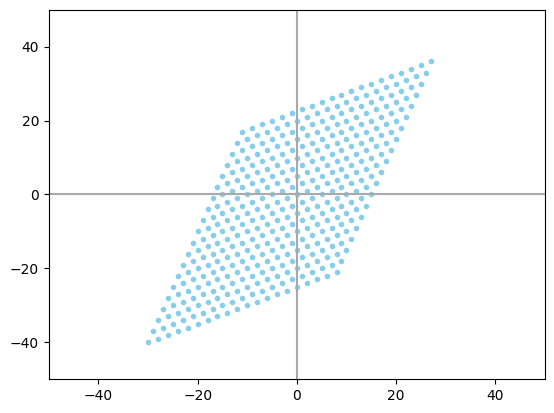

In [11]:
u = [1, 3]
v = [2, 1]

# Plotando uma amostra do conjunto de pontos no intervalo de u e v
for a in range(-10, 10):
    for b in range(-10, 10):
        plt.scatter(u[0] * a + v[0] * b, u[1] * a + v[1] * b, marker='.', color='skyblue')

# Definindo as dimensões de x e y
plt.xlim(-50, 50)
plt.ylim(-50, 50)

# Desenhando os eixos
plt.axvline(x=0, color='#A9A9A9')
plt.axhline(y=0, color='#A9A9A9')

plt.show()
plt.close()

<center><img src='https://drive.google.com/uc?export=view&id=1ujfZgxiKwIPTg2EK3z9nPUJwOzfrrwqQ' width="800"></center>


Abaixo, o exemplo de projeção escalar e vetorial, para os seguintes vetores:
\begin{equation}
\mathbf{u} = \left( \begin{matrix} 3 \\ -4 \\ 0 \end{matrix} \right) \qquad \mathbf{v} = \left( \begin{matrix} 10 \\ 5 \\ -6 \end{matrix} \right)
\end{equation}

## Matrizes

### Multiplicação de matriz por vetor $\boldsymbol{A} \times \boldsymbol{b} = \boldsymbol{c}$

Dada a matriz $\boldsymbol{A}$ e o vetor $\boldsymbol{b}$,
$$
\boldsymbol{A}= \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} \qquad \boldsymbol{b}=\begin{bmatrix} 2\\ 4 \end{bmatrix}
$$

a multiplicação  $\boldsymbol{A} \times \boldsymbol{b} = \boldsymbol{C}$ é definida por $c_{i} = a_{i,k}b_{k} = \sum_{k}a_{i,k}b_{k}$:
$$
 \boldsymbol{c} = \begin{bmatrix} a_{1,1} & a_{1,2} \\ a_{2,1} & a_{2,2} \\ a_{3,1} & a_{3,2} \end{bmatrix}\times \begin{bmatrix} b_{1} \\ b_{2} \end{bmatrix}=\begin{bmatrix} a_{1,1}b_{1} + a_{1,2}b_{2} \\ a_{2,1}b_{1} + a_{2,2}b_{2} \\ a_{3,1}b_{1} + a_{3,2}b_{2} \end{bmatrix} $$
 de forma que
 $$
 \boldsymbol{c} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix}\times \begin{bmatrix} 2 \\ 4 \end{bmatrix}= \begin{bmatrix} 1 \times 2 + 2 \times 4 \\ 3 \times 2 + 4 \times 4 \\ 5 \times 2 + 6 \times 4 \end{bmatrix}= \begin{bmatrix} 10 \\ 22 \\ 34 \end{bmatrix}
 $$

In [ ]:
A = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[2], [4]])
c = np.dot(A, b)
print(c)

### Multiplicação de duas matrizes
Dadas as matrizes $\boldsymbol{A}$ e $\boldsymbol{B}$:
$$
\boldsymbol{A}=\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ 10 & 11 & 12 \end{bmatrix} \qquad  \boldsymbol{B}=\begin{bmatrix} 2 & 7 \\ 1 & 2 \\ 3 & 6 \end{bmatrix}
$$
a multiplicação  $\boldsymbol{A} \times \boldsymbol{B} = \boldsymbol{C}$ é definida por $c_{i,j} = a_{i,k}b_{k,j} = \sum_{k}a_{i,k}b_{k,j}$:

$$
\boldsymbol{C}= \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \\ 10 & 11 & 12 \end{bmatrix} \begin{bmatrix} 2 & 7 \\ 1 & 2 \\ 3 & 6 \end{bmatrix}=\begin{bmatrix} 2 \times 1 + 1 \times 2 + 3 \times 3 & 7 \times 1 + 2 \times 2 + 6 \times 3 \\ 2 \times 4 + 1 \times 5 + 3 \times 6 & 7 \times 4 + 2 \times 5 + 6 \times 6 \\ 2 \times 7 + 1 \times 8 + 3 \times 9 & 7 \times 7 + 2 \times 8 + 6 \times 9 \\ 2 \times 10 + 1 \times 11 + 3 \times 12 & 7 \times 10 + 2 \times 11 + 6 \times 12 \\ \end{bmatrix} = \begin{bmatrix} 13 & 29 \\ 31 & 74 \\ 49 & 119 \\ 67 & 164 \end{bmatrix}
$$

In [14]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
B = np.array([[2, 7], [1, 2], [3, 6]])
C = A.dot(B)
print(C)

[[ 13  29]
 [ 31  74]
 [ 49 119]
 [ 67 164]]


In [17]:
A = np.array([[1,4], [2, 5],[3,6]])
B = np.array([[7,9],[8,10]])
C = A.dot(B)
print(C)

[[39 49]
 [54 68]
 [69 87]]


In [18]:
A = np.array([[1,2,3], [4,5,6],[7,8,9]])
B = np.array([[2,7],[1,2],[3,6]])
C = A.dot(B)
print(C)

[[ 13  29]
 [ 31  74]
 [ 49 119]]


In [ ]:
A@B

#### Propriedades da multiplicação

* Transposta: $(\boldsymbol{AB})^{\text{T}} = \boldsymbol{B}^\text{T}\boldsymbol{A}^\text{T}$

In [ ]:
A = np.array([[2, 3], [1, 4], [7, 6]])
B = np.array([[5, 3], [2, 2]])
C = np.array([[4, 9], [1, 3]])

In [ ]:
AB_t = A.dot(B).T
B_tA_t = B.T.dot(A.T)
print('(AB)^T=\n',AB_t)
print('B^T A^T=\n',B_tA_t)

* Distributiva: $\boldsymbol{A}(\boldsymbol{B}+\boldsymbol{C}) = \boldsymbol{AB}+ \boldsymbol{AC}$


In [ ]:
D1 = A.dot(B+C)
D2 = A.dot(B) + A.dot(C)
print('D1=\n',D1)
print('D2=\n',D2)

* Associativa: $\boldsymbol{A}(\boldsymbol{BC}) = (\boldsymbol{AB})\boldsymbol{C}$

In [ ]:
D1 = A.dot(B.dot(C))
D2 = (A.dot(B)).dot(C)
print('D1=\n',D1)
print('D2=\n',D2)

* Não é comutativa: $\boldsymbol{AB} \neq \boldsymbol{BA}$

In [ ]:
A = np.array([[2, 3], [6, 5]])
B = np.array([[5, 3], [2, 2]])

In [ ]:
AB = np.dot(A, B)
BA = np.dot(B, A)
print('AB=\n',AB)
print('BA=\n',BA)

### Traço de uma matriz

<center><img src='https://drive.google.com/uc?export=view&id=1hX4wCf2aVXWBEI2O3QWA-VW7QvPUdND4' width="200"></center>


In [ ]:
A = np.array([[0,2, 3], [1,6, 4], [2,6, 1]])
np.trace(A)

### Exercício dos slides
Dadas as matrizes $\boldsymbol{A}$, $\boldsymbol{B}$ e $\boldsymbol{C}$:
$$
\boldsymbol{A}=\begin{bmatrix} 4 & 12  \\ 7 & 6 \end{bmatrix} \qquad  \boldsymbol{B}=\begin{bmatrix} 1 & -3  \\ 4 & 3 \end{bmatrix} \qquad
\boldsymbol{C}=\begin{bmatrix} 6 & 6  \\ 2 & 5 \end{bmatrix}
$$

Calcule as matrizes $\boldsymbol{ABC}$, $\boldsymbol{CAB}$ e $\boldsymbol{BCA}$ e seus respectivos traços.


In [ ]:
A = np.array([[4,12],
              [7,6]])
B = np.array([[1,-3],
              [4,3]])
C = np.array([[6,6],
              [2,5]])

In [ ]:
ABC = np.dot(np.dot(A, B),C)
print(ABC)
print(np.trace(ABC))

In [ ]:
CAB = np.dot(np.dot(C,A),B)
print(CAB)
print(np.trace(CAB))

In [ ]:
BCA = np.dot(np.dot(B,C),A)
print(BCA)
print(np.trace(BCA))

# Transformação Afim
Uma transformação afim é qualquer transformação que preserva a colinearidade (ou seja, todos os pontos que se encontram em uma linha inicialmente ainda permanecem em uma linha após a transformação) e razões de distâncias (por exemplo, o ponto médio de um segmento de linha permanece o ponto médio após a transformação).
Em geral, uma transformação afim é uma composição de rotações, translações, ampliações e cisalhamento.


Escalonamento dos eixos $x$ e $y$:
\begin{equation}
\begin{bmatrix} \color{red}{S_1} & \color{red}0 & \color{red}0 & \color{red}0 \\ \color{green}0 & \color{green}{S_2} & \color{green}0 & \color{green}0 \\ \color{blue}0 & \color{purple}0 & \color{purple}0 & \color{purple}1 \end{bmatrix}  \begin{pmatrix} x \\ y \\ 1 \end{pmatrix} = \begin{pmatrix} \color{red}{S_1} \times x \\ \color{green}{S_2} \times y \\ 1 \end{pmatrix}
\end{equation}

Translação em $x$ e $y$:
\begin{equation}
\begin{bmatrix}  \color{red}1 & \color{red}0 & \color{red}0 & \color{red}{T_x} \\ \color{green}0 & \color{green}1 & \color{green}0 & \color{green}{T_y}  \\ \color{purple}0 & \color{purple}0 & \color{purple}0 & \color{purple}1 \end{bmatrix}  \begin{pmatrix} x \\ y  \\ 1 \end{pmatrix} = \begin{pmatrix} x + \color{red}{T_x} \\ y + \color{green}{T_y}  \\ 1 \end{pmatrix}
 \end{equation}

Rotação em torno do eixo $z$:

\begin{equation}
\begin{bmatrix} \color{red}{\cos \theta} & - \color{red}{\sin \theta} & \color{red}0 & \color{red}0 \\ \color{green}{\sin \theta} & \color{green}{\cos \theta} & \color{green}0 & \color{green}0 \\ \color{purple}0 & \color{purple}0 & \color{purple}0 & \color{purple}1 \end{bmatrix}  \begin{pmatrix} x \\ y  \\ 1 \end{pmatrix} = \begin{pmatrix} \color{red}{\cos \theta} \times x - \color{red}{\sin \theta} \times y  \\ \color{green}{\sin \theta} \times x + \color{green}{\cos \theta} \times y  \\ 1 \end{pmatrix}
 \end{equation}

<center><img src='https://drive.google.com/uc?export=view&id=12BK9dGWkT6HulWjKjmZAZ5bTCpmrHTBF' width="600"></center>


Para mais informações veja o [link](https://github.com/amcquistan/affine-image-transforms-python/blob/master/Affine%20Transforms%20In%20Python.ipynb).

[4 2 1] [3 3 1] [3 2 1] [4 3 1]


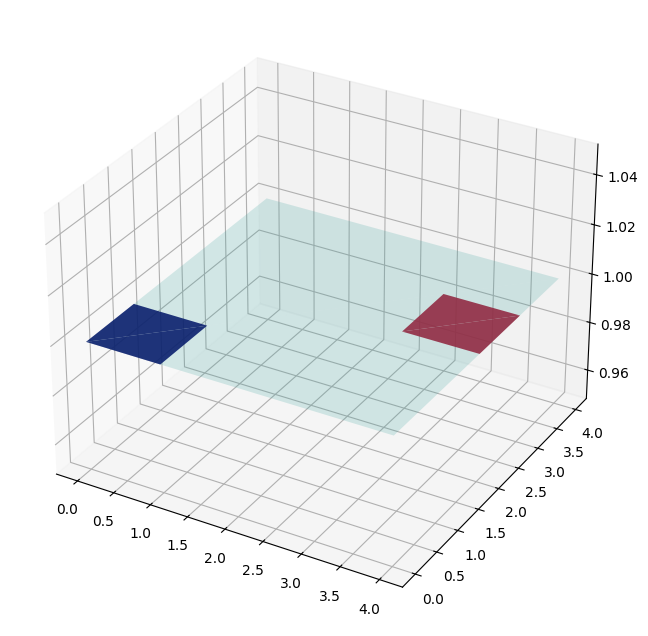

In [22]:
A = [[1 , 0 ,  3],
 [0 ,  1 ,  2],
 [0 ,  0 ,  1]]

P1 = np.array([1, 0, 1])
P2 = np.array([0, 1, 1])
P3 = np.array([0, 0, 1])
P4 = np.array([1, 1, 1])

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

X = np.array([4, 0,0,4])
Y = np.array([0, 4, 0, 4])
Z = np.array([1,1,1,1])
surf1 = ax.plot_trisurf(X, Y, Z, antialiased=True, color = 'mediumturquoise', alpha = 0.2)

X = np.array([P1[0], P2[0],P3[0],P4[0]])
Y = np.array([P1[1], P2[1],P3[1],P4[1]])
Z = np.array([P1[2], P2[2],P3[2],P4[2]])

surf2 = ax.plot_trisurf(X, Y, Z, antialiased=True, color = 'navy', alpha = 0.9)

Q1 = A @ P1.T
Q2 = A @ P2.T
Q3 = A @ P3.T
Q4 = A @ P4.T
print(Q1,Q2,Q3,Q4)

X = np.array([Q1[0], Q2[0],Q3[0],Q4[0]])
Y = np.array([Q1[1], Q2[1],Q3[1],Q4[1]])
Z = np.array([Q1[2], Q2[2],Q3[2],Q4[2]])
surf3 = ax.plot_trisurf(X, Y, Z, antialiased=True, color = 'crimson', alpha = 0.9)

plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

In [24]:
from scipy import ndimage as ndi
import cv2 as cv

ModuleNotFoundError: No module named 'scipy'

In [23]:
image = cv.imread('letterL.jpg') # lê a imagem
image1 = cv.cvtColor(image, cv.COLOR_BGR2HSV) # converte RGB para HSV
img = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # converte RGB para Escala de cinza
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv.cvtColor(image1, cv.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img, cmap='gray'),plt.title('Escala de cinza')
plt.xticks([]), plt.yticks([])
plt.show()
print(img)
w,h = img.shape
print('Foto com altura {:4d} e largura {:4d}'.format(h, w))

NameError: name 'cv' is not defined

In [ ]:
img.shape

In [ ]:
#aplicando a identidade
mat_identity = np.array([[1,0,0],[0,1,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_identity)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray')

## Exemplos dos slides

In [25]:
#transformação de reflexão (ao longo do eixo x):
mat_reflect = np.array([[1,0,0],[0,-1,0],[0,0,1]]) @ np.array([[1,0,0],[0,1,-h],[0,0,1]])
img1 = ndi.affine_transform(img, mat_reflect) # offset=(0,h)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray');

NameError: name 'h' is not defined

In [ ]:
#Escalonamento da imagem (0,75x ao longo do eixo x e 1,25x ao longo do eixo y):
s_x, s_y = 0.75, 1.25
mat_scale = np.array([[s_x,0,0],[0,s_y,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_scale)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray');

In [ ]:
# Rotação da imagem em 30° no sentido anti-horário.
#É uma operação composta:
#1. deslocar/centralizar a imagem para aplicar a rotação e depois aplicar deslocamento inverso:
theta = np.pi/6
R = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])
mat_rotate = np.array([[1,0,w/2],[0,1,h/2],[0,0,1]]) @ R.T  @ np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
img1 = ndi.affine_transform(img, mat_rotate)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray');

In [ ]:
#transformação de cisalhamento na imagem
lambda1 = 0.3
mat_shear = np.array([[1,lambda1,0],[lambda1,1,0],[0,0,1]])
img1 = ndi.affine_transform(img, mat_shear)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray');

In [ ]:
mat_all = mat_identity @ mat_reflect @ mat_scale @ mat_rotate @ mat_shear
img1 = ndi.affine_transform(img, mat_all)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray');

In [18]:
alpha, beta = 2,1
S = np.array([[alpha, 0, 0], [0, beta, 0], [0, 0, 1]])
theta = -np.pi/2
R = np.array([[np.cos(theta),-np.sin(theta),0],[np.sin(theta),np.cos(theta),0],[0,0,1]])

In [ ]:
img1 = ndi.affine_transform(img, S)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray');

In [ ]:
T=np.array([[1,0,w/2],[0,1,h/2],[0,0,1]])
T_inv = np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
img1 = ndi.affine_transform(img, T @ R.T @ T_inv)
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray');

In [22]:
T=np.array([[1,0,w/2],[0,1,h/2],[0,0,1]])
T_inv = np.array([[1,0,-w/2],[0,1,-h/2],[0,0,1]])
#Se a imagem for primeiro girada e depois escalonada, a ordem do produto escalar precisa ser invertida:
RS = S @ T @ R.T @ T_inv
SR =  T @ R.T @ T_inv @ S

In [ ]:
img1 = ndi.affine_transform(img,RS )
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray')

In [ ]:
img1 = ndi.affine_transform(img,SR )
plt.figure(figsize=(5, 5))
plt.imshow(img1, cmap='gray')